<h2><b> Assignment Python 3

Nama : Tsaabitah Anggraini

Kode Peserta : PYTN-KS12-023

<h3><b> Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

<br>

<h3><b> Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

<br>

<h3><b>Data Loading

In [2]:
# Data Train
df = pd.read_csv('Dataset/bank-additional/bank-additional-full.csv', delimiter=";")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Data Test
df_test = pd.read_csv('Dataset/bank-additional/bank-additional.csv', delimiter=";")
df_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [6]:
df_test.shape

(4119, 21)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

<br>

<h3><b>Data Cleaning

Dilalukan pengecekan dataset apakah terdapat missing value dan duplikasi data

In [8]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Diketahui bahwa tidak ada missing value pada keseluruhan data

In [9]:
df.duplicated().sum()

12

Karena terdapat 12 data yang duplikat, maka data duplikat tersebut akan dihapus dari dataset

In [10]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [11]:
df_test.replace(' ',np.nan, inplace=True)
df_test.isna().sum() /len(df) *100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [12]:
df_test.duplicated().sum()

0

Diketahui tidak ada missing value dan duplikasi data pada df test

In [13]:
# Mengelompokkan kolom berdasarkan tipe data
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['y']

<br>

<h3><b> Visualization

Menentukan persentase keputusan akhir client untuk bergabung dengan program kredit pada campaign ini.

In [14]:
df_decision = df['y'].value_counts(normalize=True)*100

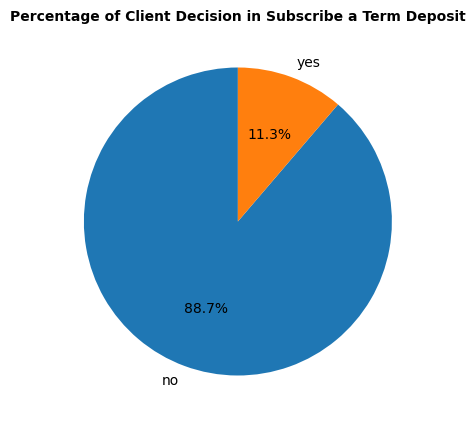

In [15]:
plt.figure(figsize=(5,5))
font = {'weight': 'bold','size': 10,}
ax = plt.axes()
labels=df['y'].unique()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab=plt.pie(df_decision, labels=labels, startangle=90,autopct='%1.1f%%')
plt.show()

Berdasarkan hasil diatas, informasi yang diketahui terdapat 11.3 % client yang memutuskan untuk menjadi nasabah di bank, sementara sisanya 88.7 % client memutuskan untuk tidak bergabung menjadi nasabah bank. Sehingga dapat disimpulkan bahwa teknik marketing melalui telepon ini kurang efektif untuk dilakukan.

Selanjutnya akan ditentukan distribusi untuk tiap kolom numerik.

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


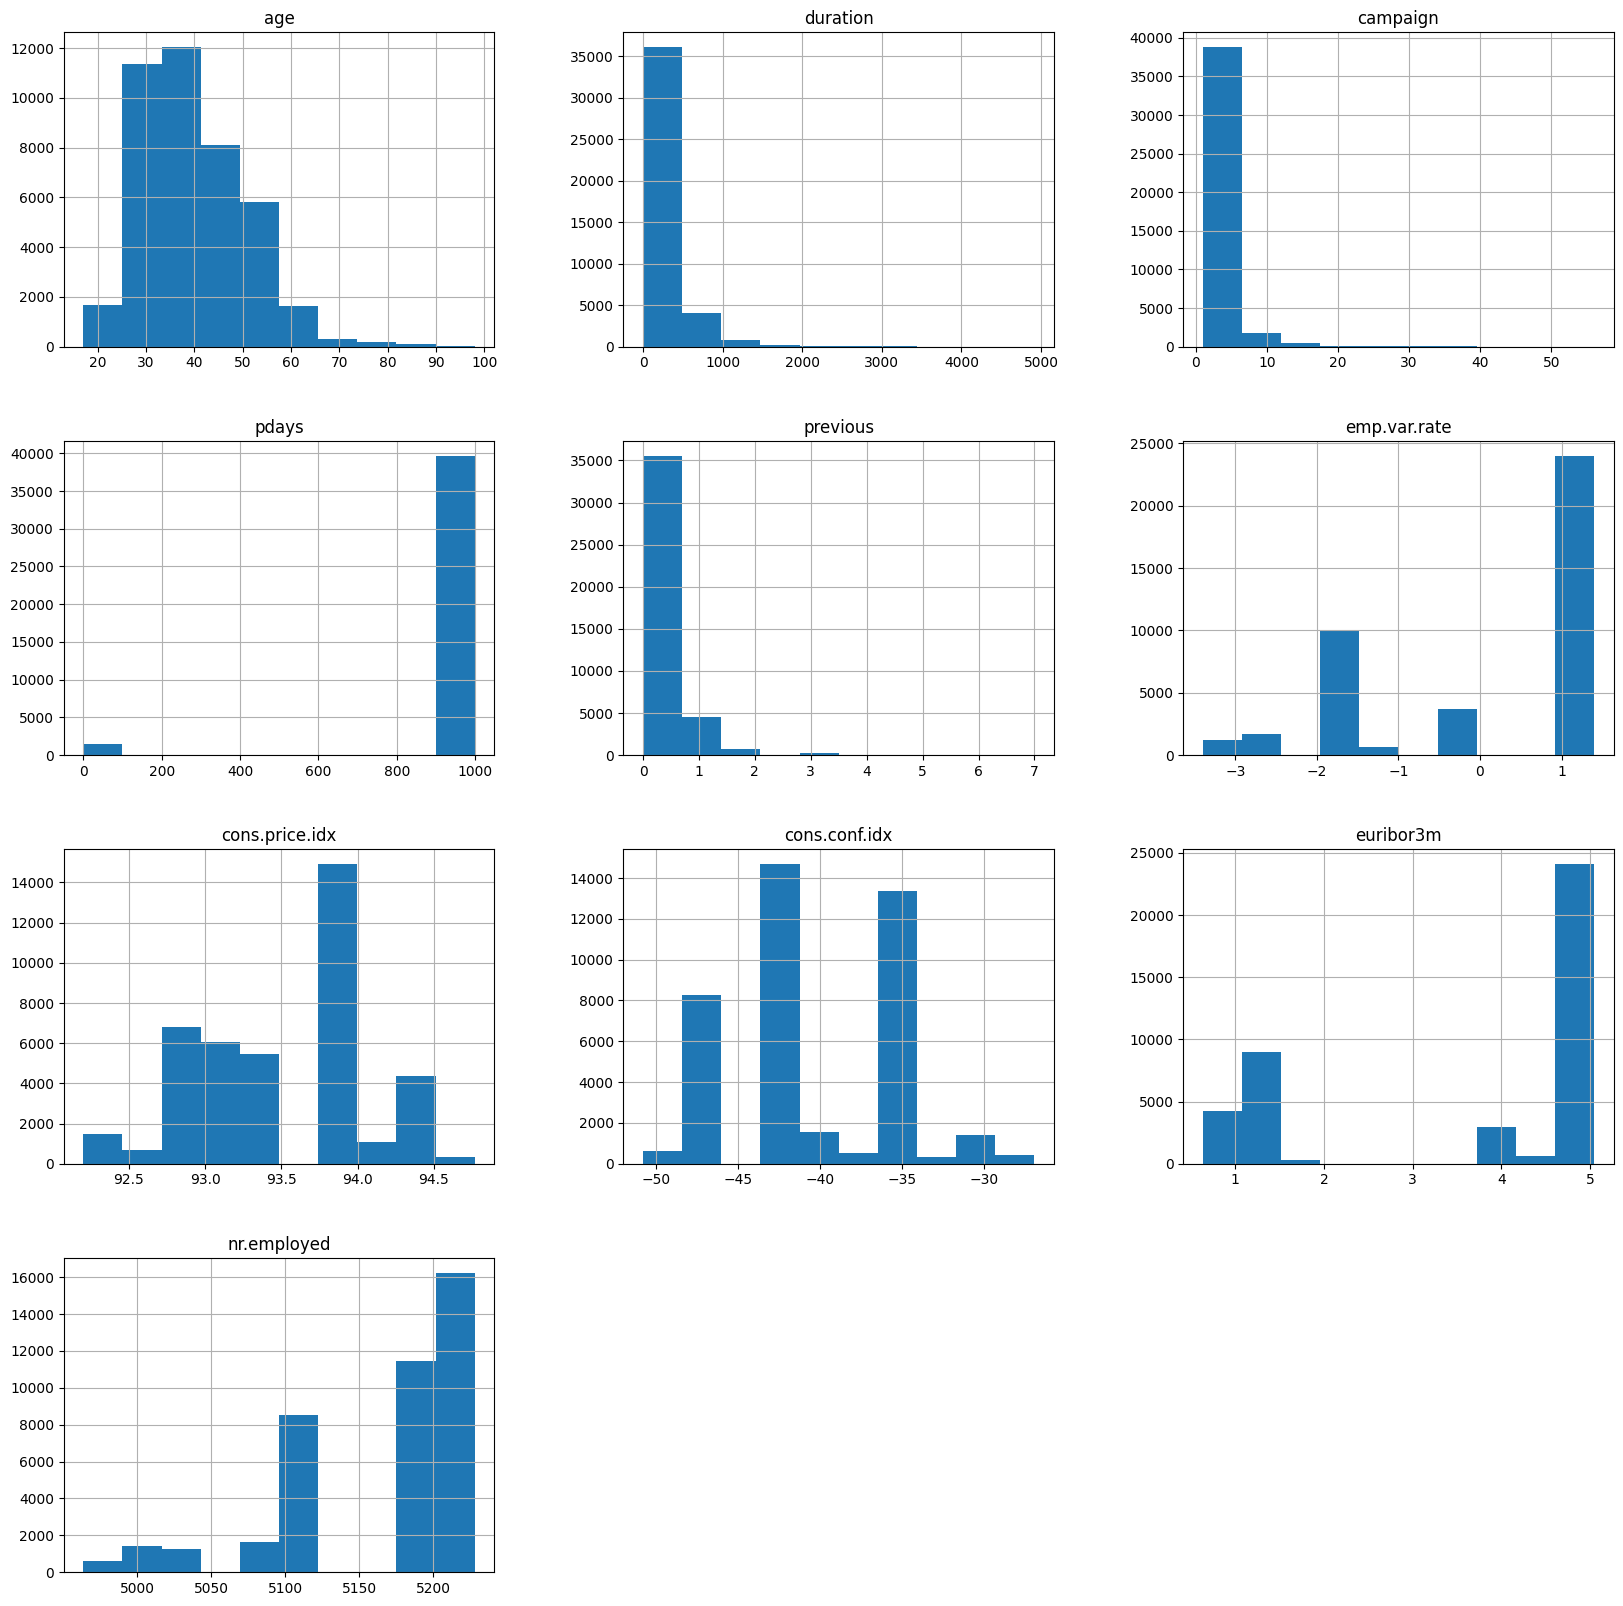

In [17]:
df.hist(figsize=(20,20))
plt.show()

Dapat dilihat bahwa untuk kolom numerik pada dataset tidak berdistribusi normal

<br>

<h3><b> Data Preprocessing

In [18]:
# Mengubah data categorical dan boolean menjadi numerical
le = preprocessing.LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])
for col in boolean:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])

In [19]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [20]:
df_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,7,2,6,0,0,0,0,9,2,...,3,999,2,0,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,0,2,6,0,2,0,0,9,1,...,4,999,0,1,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,2,1,6,1,2,0,0,7,1,...,2,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,7,0,5,0,0,0,0,7,3,...,1,999,1,0,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,1,1,2,1,0,0,1,6,2,...,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0


In [21]:
# Menentukan x_train dan y_train
x_arr = df[features].to_numpy()
x_train = x_arr
y_arr = df['y'].astype('int')
y_arr = y_arr.to_numpy()
y_train = y_arr

In [22]:
# Menentukan x_test dan y_test
x_arr2 = df_test[features].to_numpy()
x_test = x_arr2
y_arr2 = df_test['y'].astype('int')
y_arr2 = y_arr2.to_numpy()
y_test = y_arr2

<br>

<h3><b> Classification

<h4><b>Logistic Regression

In [23]:
lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print(classification_report(y_test, lr_pred))
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.68      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119

Accuracy: 0.913814032532168


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 91,4%

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


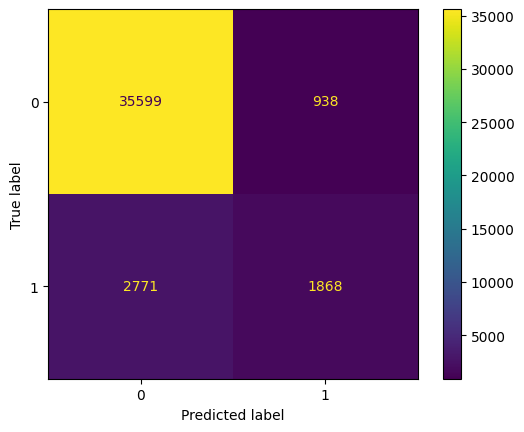

In [24]:
plot_confusion_matrix(lr, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

* 35599 prediksi true negatif: 35599 data prediksi benar dinyatakan sebagai nol
* 2771 prediksi false negatif: 2771 data prediksi salah dinyatakan sebagai nol.
* 938 prediksi false positif: 938 data prediksi salah dinyatakan sebagai satu.
* 1868 prediksi positif yang benar: 1868 data prediksi benar dinyatakan sebagai satu.

<h4><b>K-Nearest Neighbour

In [25]:
error = []

In [26]:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

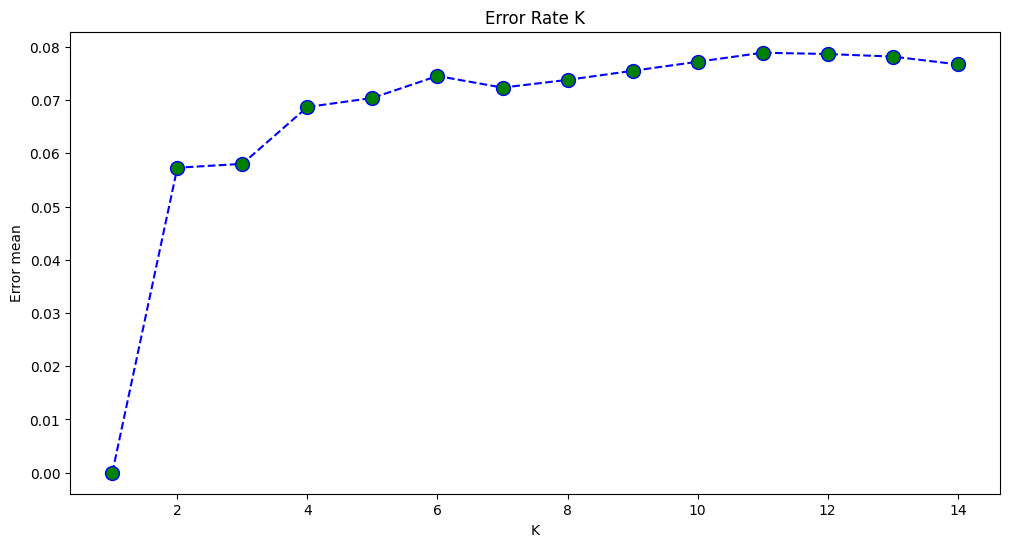

In [27]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

Berdasarkan angka Error Rate K, nilai K diputuskan pada 6 karena tidak ada peningkatan signifikan terhadap kesalahan berarti dari 7 ke atas

In [28]:
knn2 = KNeighborsClassifier(n_neighbors=6)

# Melatih model dengan menggunakan data train
knn2.fit(x_train, y_train)

# Hasil predict
knn2_pred = knn2.predict(x_test)

print(classification_report(knn2_pred,y_test))
print("Accuracy:",metrics.accuracy_score(knn2_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3825
           1       0.49      0.74      0.59       294

    accuracy                           0.93      4119
   macro avg       0.73      0.84      0.77      4119
weighted avg       0.94      0.93      0.93      4119

Accuracy: 0.9254673464433115


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 92,5%

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


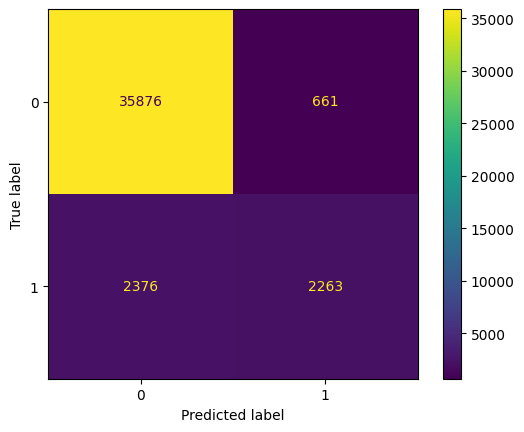

In [29]:
plot_confusion_matrix(knn2, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

* 35876 prediksi true negatif: 35876 data prediksi benar dinyatakan sebagai nol
* 2376 prediksi false negatif: 2376 data prediksi salah dinyatakan sebagai nol.
* 661 prediksi false positif: 661 data prediksi salah dinyatakan sebagai satu.
* 2263 prediksi true positif: 2263 data prediksi benar dinyatakan sebagai satu.

<h4><b>Support Vector Machine

In [30]:
svm_model = LinearSVC()
svm_model.fit(x_train,y_train)

svm_score_train = svm_model.score(x_train, y_train)
print(svm_score_train)

0.8875558577812318


c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
svm_pred = svm_model.predict(x_test)
print(classification_report(svm_pred,y_test))
print("Accuracy:",metrics.accuracy_score(svm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4113
           1       0.01      0.83      0.02         6

    accuracy                           0.89      4119
   macro avg       0.51      0.86      0.48      4119
weighted avg       1.00      0.89      0.94      4119

Accuracy: 0.8914785142024764


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 89.1%

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


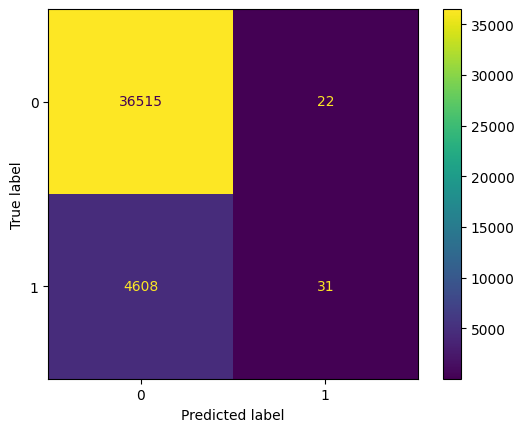

In [32]:
plot_confusion_matrix(svm_model, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

* 36515 prediksi true negatif: 36515 data prediksi benar dinyatakan sebagai nol
* 4608 prediksi false negatif: 4608 data prediksi salah dinyatakan sebagai nol.
* 22 prediksi false positif: 22 data prediksi salah dinyatakan sebagai satu.
* 31 prediksi true positif: 31 data prediksi benar dinyatakan sebagai satu.

<h4><b>Decision Tree

In [33]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [34]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=1, criterion='gini')

# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)

# Predict the response for test dataset
dt_pred = dt.predict(x_test)

print(classification_report(y_test, dt_pred))
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3668
           1       0.00      0.00      0.00       451

    accuracy                           0.89      4119
   macro avg       0.45      0.50      0.47      4119
weighted avg       0.79      0.89      0.84      4119

Accuracy: 0.890507404709881


c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 89%.

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


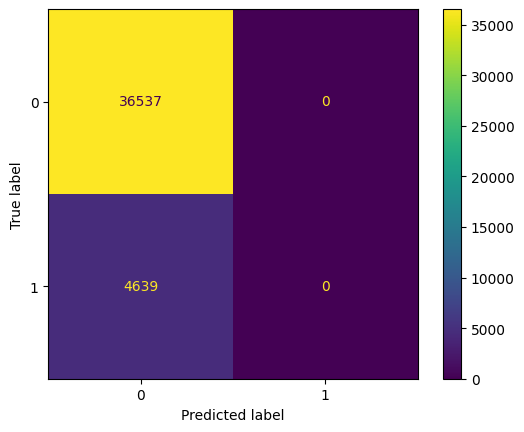

In [35]:
plot_confusion_matrix(dt, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

* 36537 prediksi true negatif: 36537 data prediksi benar dinyatakan sebagai nol
* 4639 prediksi false negatif: 4639 data prediksi salah dinyatakan sebagai nol.
* 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
* 0 prediksi true positif: 0 data prediksi benar dinyatakan sebagai satu.

<h4><b>Random Forest Classifier

In [36]:
rf = RandomForestClassifier(n_estimators=100)
 
rf.fit(x_train,y_train) 

rf_pred = rf.predict(x_test)

print(classification_report(y_test, rf_pred))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3668
           1       1.00      1.00      1.00       451

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119

Accuracy: 1.0


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang sangat baik yaitu 100%

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


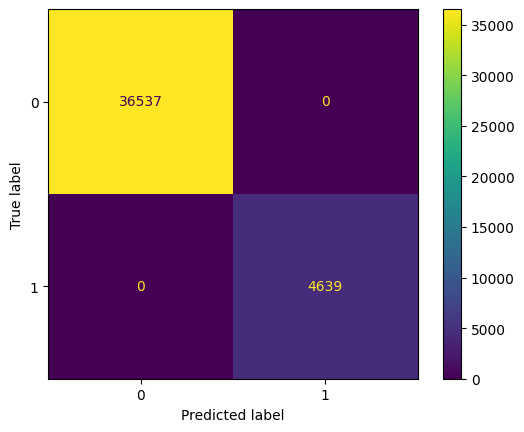

In [37]:
plot_confusion_matrix(rf, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

* 36537 prediksi true negatif: 36537 data prediksi benar dinyatakan sebagai nol
* 1 prediksi false negatif: 0 data prediksi salah dinyatakan sebagai nol.
* 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
* 4639 prediksi true positif: 4639 data prediksi benar dinyatakan sebagai satu.

<h4><b>Naive Bayes

In [38]:
nb = GaussianNB()

nb.fit(x_train,y_train)

nb_pred = nb.predict(x_test)

print(classification_report(y_test, nb_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3668
           1       0.38      0.61      0.47       451

    accuracy                           0.85      4119
   macro avg       0.66      0.74      0.69      4119
weighted avg       0.89      0.85      0.86      4119

Accuracy: 0.8465647001699441


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik yaitu 84,6%

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


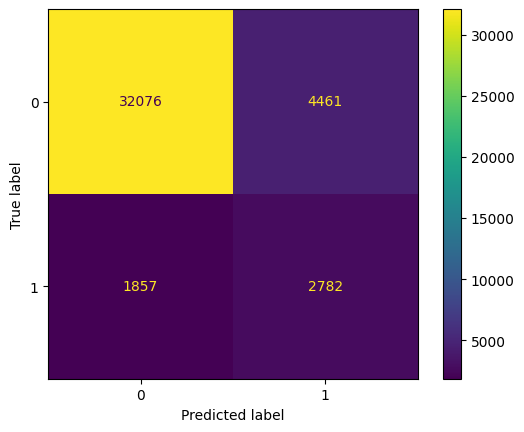

In [39]:
plot_confusion_matrix(nb, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

* 32076 prediksi true negatif: 32076 data prediksi benar dinyatakan sebagai nol
* 1857 prediksi false negatif: 1857 data prediksi salah dinyatakan sebagai nol.
* 4461 prediksi false positif: 4461 data prediksi salah dinyatakan sebagai satu.
* 2782 prediksi true positif: 2782 data prediksi benar dinyatakan sebagai satu.

<br>

<h3><b>Overall Analysis

* Terdapat 11.3 % client yang memutuskan untuk menjadi nasabah di bank, sementara sisanya 88.7 % client memutuskan untuk tidak bergabung menjadi nasabah bank. Sehingga dapat disimpulkan bahwa teknik marketing melalui telepon ini kurang efektif untuk dilakukan.
* Dari beberapa pemodelan Machine Learning yang sudah dilakukan, Random forest memiliki nilai akurasi paling baik yaitu 100%
* Meskipun akurasi dari setiap model yang digunakan cukup baik, akan tetapi nilai precision, recall, dan f1-score untuk salah satu kelas variabel target masih kurang baik. Hal ini dapat disebabkan karena adanya ketidakseimbangan data target (imbalance data) sehingga perlu dilakukan eksplorasi yang lebih mendalam terhadap data pada tahap EDA.